# Ejemplo de FCA

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
from scipy.stats import ortho_group

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, parent_dir)

In [3]:
from BSS import Mezcla_imagenes, FCA, unmixing_error

In [4]:
# cargar la imagen en blanco y negro
ruta_imagen = "../Images/cat2.jpg"
imagen_original = io.imread(ruta_imagen, as_gray = True)

# reducir la resolución 
factor_reduccion = 0.2
nuevo_ancho = int(imagen_original.shape[1] * factor_reduccion)  
nuevo_alto = int(imagen_original.shape[0] * factor_reduccion)   
imagen_gato = transform.resize(imagen_original, (nuevo_alto, nuevo_ancho), anti_aliasing=True)

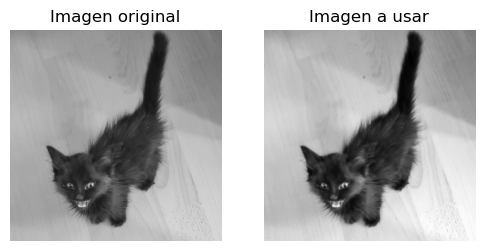

Dimensiones de la imagen a usar: (287, 287)


In [5]:
# ver la origianl y la que voy a usar
fig, ax = plt.subplots(1, 2, figsize = (6, 3))
# original
ax[0].imshow(imagen_original, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Imagen original')
# x1
ax[1].imshow(imagen_gato, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Imagen a usar')
plt.show()

# ver dimensiones
print("Dimensiones de la imagen a usar:", imagen_gato.shape)

# FCA con dos señales

* x1: imagen del gato
* x2: ruido gausiano

In [6]:
# la primera señal es la imagen
x1 = imagen_gato

# hacer la segunda señal, ruido
# matrices deterministas son asintoticamente libres de ruido gaussiano
x2 = np.random.randn(x1.shape[0], x1.shape[1])
print("Dimensiones de la señal x2:", x2.shape)

Dimensiones de la señal x2: (287, 287)


In [7]:
# juntar las señales 
señales_originales_x = [x1, x2]

In [8]:
# delimitar la matriz de mezcla
# uso la misma que se usa en el paper 
A = np.array([[np.sqrt(2)/2,  np.sqrt(2)/2],
              [-np.sqrt(2)/2, np.sqrt(2)/2]])

A

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

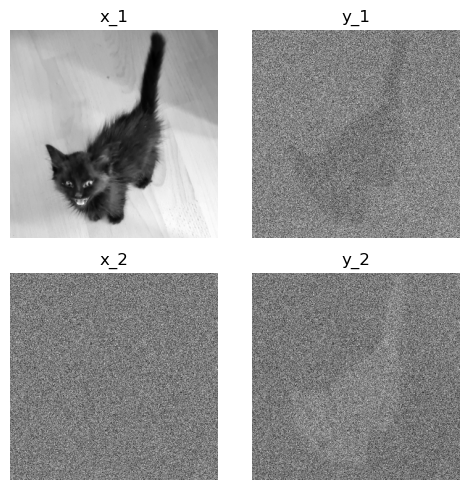

In [9]:
# hacer el objeto de mezcla
mezcla = Mezcla_imagenes(señales_originales_x, A)
# obtener las señales y resultado de la mezcla
señales_y = mezcla.mezclar_señales()
# ver
mezcla.ver_mezcla(figsize = (5, 5))

C:\Users\diego\anaconda3\envs\ds\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


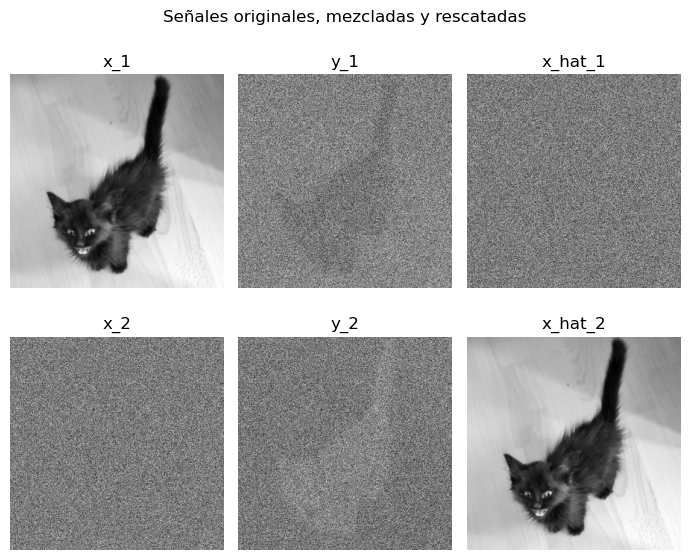

In [10]:
# ejecutar FCA
fca = FCA(señales_y)
x_hat = fca.separar_señaes(repeticiones_optimizacion = 2, iniciar_W_ortogonal = False)

# ver el resultado
fca.ver(señales_x_originales = señales_originales_x, figsize = (7, 6))

In [11]:
# ver el error de estimacion
error_fca = unmixing_error(A, fca.A_hat)
print(f"Error de estimacion: {error_fca}")

Error de estimacion: 0.0069876307852840686


# FCA con tres señales

* x1: $G$
* x2: $U G U^{-1}$
* x3: $U^{2} G U^{-2}$

donde 

$G$ es la imagen del gato

$U$ es una matriz ortogonal

In [12]:
# la primera señar es la imagen 
x1 = imagen_gato

# tomar una matriz ortogonal aleatoria (medida de Haar)
U = ortho_group.rvs(dim=x1.shape[0])

In [13]:
# hacer las otras dos señales
x2 = U @ x1 @ np.linalg.inv(U)
x3 = np.linalg.matrix_power(U, 2) @ x1 @ np.linalg.matrix_power(U, -2)

# juntar las señales 
señales_originales_x = [x1, x2, x3]

In [14]:
# delimitar la matriz de mezcla
A = np.array([[np.sqrt(2)/2,  np.sqrt(2)/2, 4],
              [-np.sqrt(2)/2, np.sqrt(2)/2, 3],
              [2, -2, -1]])

A

array([[ 0.70710678,  0.70710678,  4.        ],
       [-0.70710678,  0.70710678,  3.        ],
       [ 2.        , -2.        , -1.        ]])

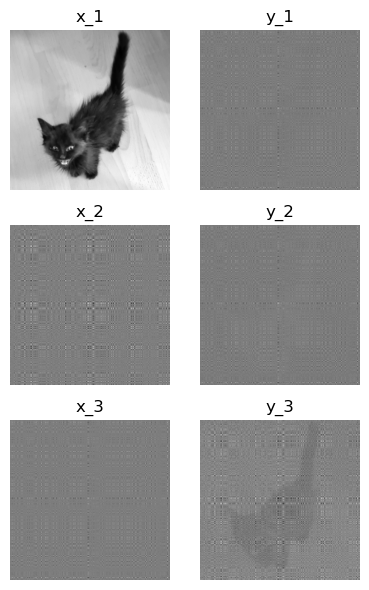

In [15]:
# hacer el objeto de mezcla
mezcla = Mezcla_imagenes(señales_originales_x, A)
# obtener las señales y resultado de la mezcla
señales_y = mezcla.mezclar_señales()
# ver
mezcla.ver_mezcla(figsize = (4, 6))

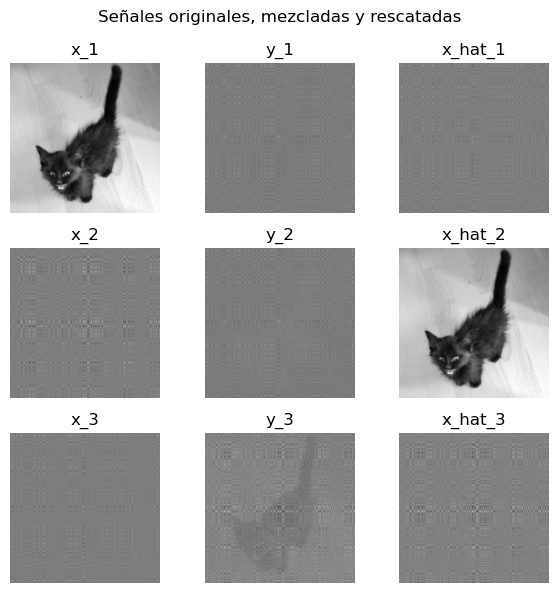

In [16]:
# ejecutar FCA
fca = FCA(señales_y)
x_hat = fca.separar_señaes(repeticiones_optimizacion = 2, iniciar_W_ortogonal = False)

# ver el resultado
fca.ver(señales_x_originales = señales_originales_x, figsize = (6, 6))

In [17]:
# ver el error de estimacion
error_fca = unmixing_error(A, fca.A_hat)
print(f"Error de estimacion: {error_fca}")

Error de estimacion: 0.004914106943303841
